In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt


import datetime
import calendar

import numpy as np
import pandas as pd

import datetime as dt

from scipy.stats import ttest_ind

# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func
from sqlalchemy import extract

# Reflect Tables into SQLAlchemy ORM

In [2]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [3]:
#################################################
# Database Setup
#################################################
engine = create_engine("sqlite:///hawaii.sqlite")
session = Session(engine)
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

# Save reference to the table

Measurement = Base.classes.measurement
Station = Base.classes.station

In [4]:
# reflect an existing database into a new model

# reflect the tables

In [5]:
# We can view all of the classes that automap found


In [6]:
# Save references to each table


In [7]:
# Create our session (link) from Python to the DB


# Exploratory Climate Analysis

<Figure size 432x288 with 0 Axes>

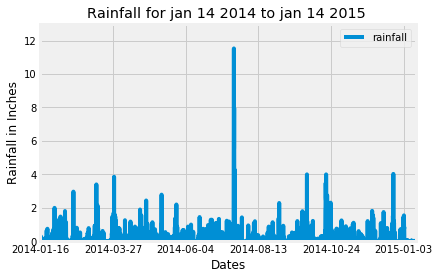

In [8]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results

# Calculate the date 1 year ago from the last data point in the database

# Perform a query to retrieve the data and precipitation scores

# Save the query results as a Pandas DataFrame and set the index to the date column

# Sort the dataframe by date

dates = []
rainfalls = []
for a,b in session.query(Measurement.date, Measurement.prcp).\
    filter(Measurement.date > '2014-01-15').filter(Measurement.date < '2015-01-15').\
    order_by(Measurement.date).all():
        dates.append(a)
        rainfalls.append(b)

for i in range(len(rainfalls)):
    if rainfalls[i] == rainfalls[29]:
        rainfalls[i] = 0.0



data = pd.DataFrame(rainfalls, dates)
data.columns = ['rainfall']
data.index.name = 'date'
data.fillna(0.0, inplace=True)
#with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
#    print(data)

# Use Pandas Plotting with Matplotlib to plot the data


plt.figure()
data.plot()
plt.ylim((0, 13))
plt.xlabel('Dates')
plt.ylabel('Rainfall in Inches')
plt.title('Rainfall for jan 14 2014 to jan 14 2015 ')
plt.show()

In [9]:
# Use Pandas to calcualte the summary statistics for the precipitation data
print(data.describe())

          rainfall
count  2589.000000
mean      0.161081
std       0.489456
min       0.000000
25%       0.000000
50%       0.010000
75%       0.120000
max      11.530000


In [10]:
# Design a query to show how many stations are available in this dataset?


session = Session(engine)
Base = automap_base()
Base.prepare(engine, reflect=True)
# query the data
stations = []
rainfalls = []
results = []
# get results for year 2017
for a,b,c in session.query(Measurement.station, Measurement.tobs, Measurement.date).\
filter(Measurement.date > '2017-01-01').\
order_by(Measurement.station) .\
order_by(Measurement.date).all():
        resultsdict = {}
        resultsdict["station"] = a
        resultsdict["tobs"] = b
        resultsdict["date"] = c
        results.append(resultsdict)
session.close()
 # convert to dataframe
data = pd.DataFrame(results)
# ditch rows with null values
data = data.dropna()
# sort to find station with most results
counts = data.groupby('station').count()

counts = counts.sort_values('date', ascending = False)




mostActiveStation = counts.index[0]
# filter data based on station with most values
data2 = data.loc[data['station'] == mostActiveStation]
#print(data2)
print('most active station is: ')
print(mostActiveStation)


most active station is: 
USC00519397


In [11]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.
print(counts)


             tobs  date
station                
USC00519397   229   229
USC00516128   221   221
USC00519281   220   220
USC00513117   211   211
USC00519523   209   209
USC00514830   194   194
USC00517948   107   107


In [12]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature of the most active station?


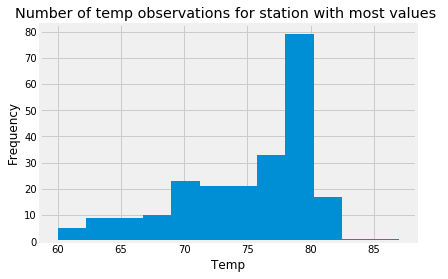

In [13]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram

# plot counts
d3 = data2['tobs'].tolist()
plt.hist(d3, bins = 12)
plt.xlabel('Temp')
plt.ylabel('Frequency')
plt.title('Number of temp observations for station with most values ')
plt.show()



## Bonus Challenge Assignment

In [14]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

[(62.0, 69.57142857142857, 74.0)]


In [15]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.



#Hawaii is reputed to enjoy mild weather all year.
#Is there a meaningful difference between the temperature in, for example, June and December?
#You may either use SQLAlchemy or pandas's read_csv() to perform this portion.
#Identify the average temperature in June at all stations across all available years in the dataset.


#Identify the average temperature in June at all stations across all available years in the dataset
session = Session(engine)
Base = automap_base()
Base.prepare(engine, reflect=True)

res = session.query(Measurement.tobs, Measurement.date).filter(extract('month', Measurement.date)==6).all()
session.close()
 # convert to dataframe
junedata = pd.DataFrame(res)

#print(junedata)
print(junedata.mean(skipna = True))

# Do the same for December temperature.

session = Session(engine)
Base = automap_base()
Base.prepare(engine, reflect=True)

res = session.query(Measurement.tobs, Measurement.date).filter(extract('month', Measurement.date)==12).all()
session.close()
 # convert to dataframe
decData = pd.DataFrame(res)

#print(decData)
print(decData.mean(skipna = True))
#Use the t-test to determine whether the difference in the means, if any, is statistically significant.
#Will you use a paired t-test, or an unpaired t-test? Why?

'''
You cant use a paired t-test because the sample sizes are not the same 

tobs    74.944118
dtype: float64
tobs    71.041529
dtype: float64
Ttest_indResult(statistic=31.60372399000329, pvalue=3.9025129038616655e-191)


this is a statistically significant result bec
'''


cat1 = junedata['tobs']
cat2 = decData['tobs']

print(ttest_ind(cat1, cat2))





tobs    74.944118
dtype: float64
tobs    71.041529
dtype: float64
Ttest_indResult(statistic=31.60372399000329, pvalue=3.9025129038616655e-191)


[(56.0, 73.12442396313364, 85.0)]


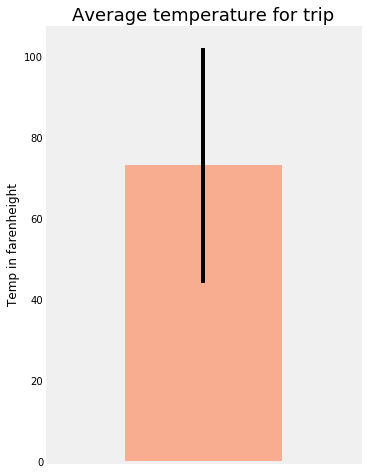

In [16]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)

'''
Use the calc_temps function to calculate the min, avg, and max temperatures for your trip
 using the matching dates from the previous year
 (i.e., use "2017-01-01" if your trip start date was "2018-01-01").
'''
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.

    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d

    Returns:
        TMIN, TAVE, and TMAX
    """

    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
values = calc_temps('2014-01-15', '2015-01-15')
print(values)

df5 = pd.DataFrame(values, columns=['Min Temp', 'Average Temp', 'Max Temp'])
tmin_tmax_temp = df5.iloc[0]['Max Temp'] - df5.iloc[0]['Min Temp']
avg_temp = df5['Average Temp']
avg_temp.plot(kind='bar', yerr=tmin_tmax_temp, figsize=(5,8), alpha=0.6, color='coral')
plt.title("Average temperature for trip", fontsize=18)
plt.ylabel("Temp in farenheight")
plt.xticks([])
plt.grid()
plt.show()



In [17]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation



''''
Calculate the rainfall per weather station using the previous year's matching dates.
 '''

engine = create_engine("sqlite:///hawaii.sqlite")
session = Session(engine)
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

# Save reference to the table

Measurement = Base.classes.measurement
Station = Base.classes.station

d7 =  session.query(Measurement.station, Measurement.prcp).\
    filter(Measurement.date > '2014-01-15').filter(Measurement.date < '2015-01-15').\
    order_by(Measurement.station).all()
rainData = pd.DataFrame(d7)

#print(rainData)

stationTotals = rainData.groupby(['station']).sum()
print(stationTotals)




               prcp
station            
USC00511918   20.37
USC00513117   56.86
USC00514830   38.49
USC00516128  141.88
USC00517948    6.58
USC00518838    0.10
USC00519281   87.18
USC00519397   20.55
USC00519523   45.03


In [18]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

[(62.0, 69.15384615384616, 77.0)]

In [19]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip

# Use the start and end date to create a range of dates

# Stip off the year and save a list of %m-%d strings

# Loop through the list of %m-%d strings and calculate the normals for each date


tripDates = [("01-10"), ("01-11"), ("01-12"), ("01-13"), ("01-14"), ("01-15")]

tripData = []

for i in range(6):
    tripData.append(daily_normals(tripDates[i]))
tmin = []
tmax = []
tavg = []
for v in tripData:
    tmin.append(v[0][0])
    tmax.append(v[0][1])
    tavg.append(v[0][2])

d10 = list(zip(tmin,tmax,tavg))



tripdf = pd.DataFrame( data = d10, index = tripDates, columns = [ 'tmin', 'tavg', 'tmax'])
print(tripdf)






       tmin       tavg  tmax
01-10  62.0  69.741379  77.0
01-11  57.0  67.310345  78.0
01-12  57.0  67.407407  81.0
01-13  57.0  67.254545  77.0
01-14  58.0  69.526316  77.0
01-15  56.0  69.313725  78.0


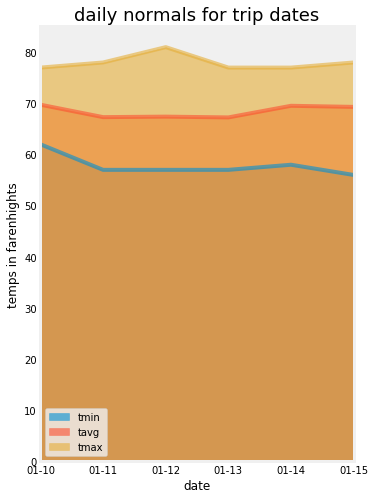

In [20]:
# Plot the daily normals as an area plot with `stacked=False`

tripdf.plot.area( stacked = False, figsize=(5,8), alpha=0.6)
plt.title("daily normals for trip dates", fontsize=18)
plt.ylabel("temps in farenhights")
plt.xlabel("date")
plt.grid()
plt.show()

